In [81]:
from IPython.display import Image, HTML

In [82]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


In [83]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from datetime import datetime

In [84]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

### Hedging: with Reinforcement Learning?

Walter Freyn


Miguel Vaz

## Disclaimer


# Our employers are not to blame!

### About ourselves

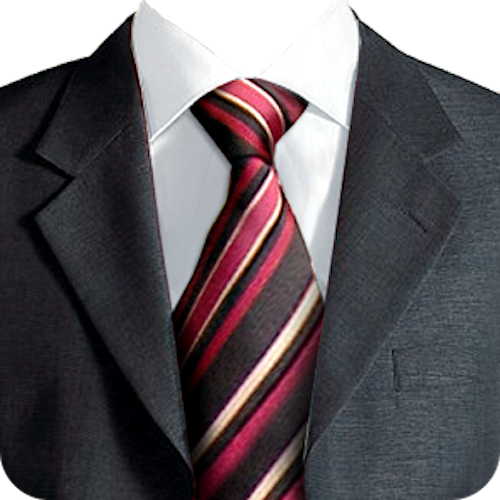

In [85]:
Image('pics/tie.png')

### Consultants

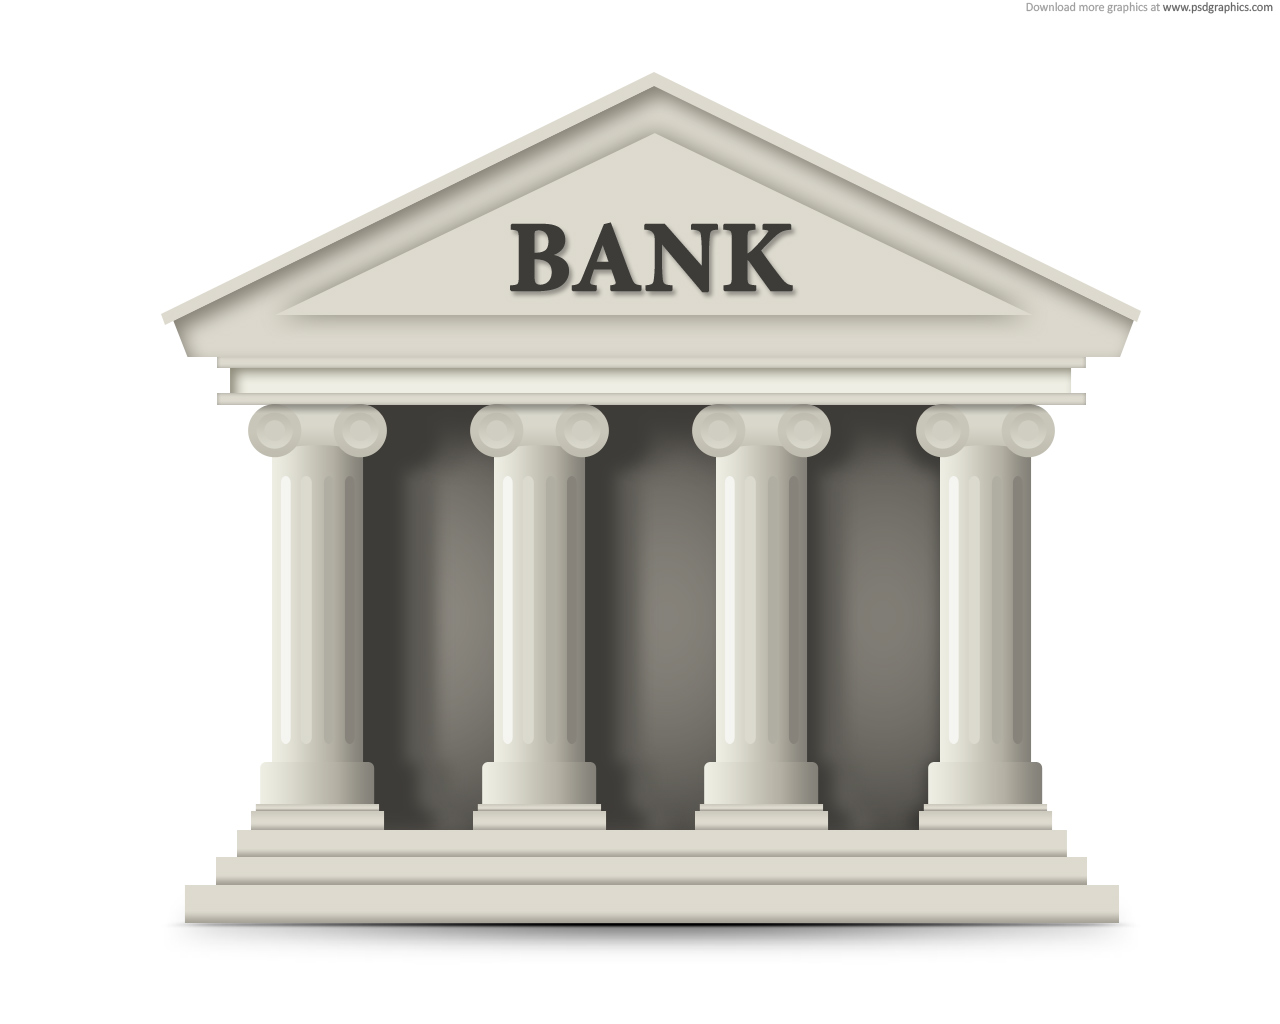

In [86]:
Image('pics/bank-and-security.jpg')

### Finance and risk management

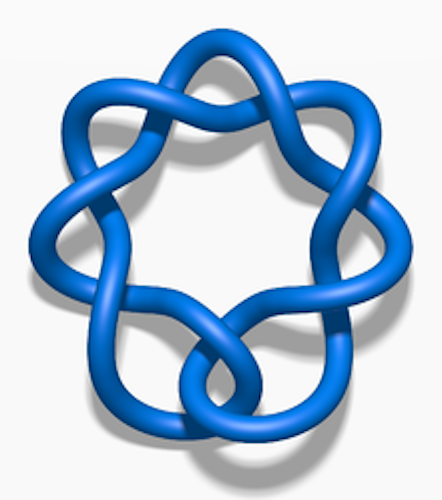

In [87]:
Image('pics/main-qimg-e9446bdc5473cb807ac9ca3275115eec.png')

### Walter likes algebraic geometry ...

### ... and string theory

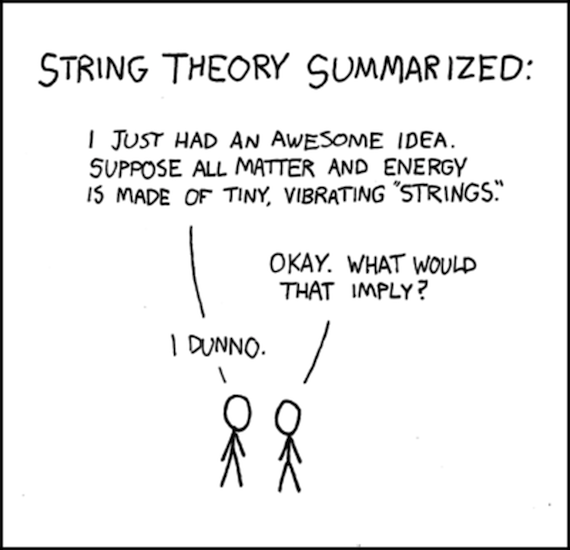

In [88]:
Image('pics/image-20160311-11288-1y395cq.png')

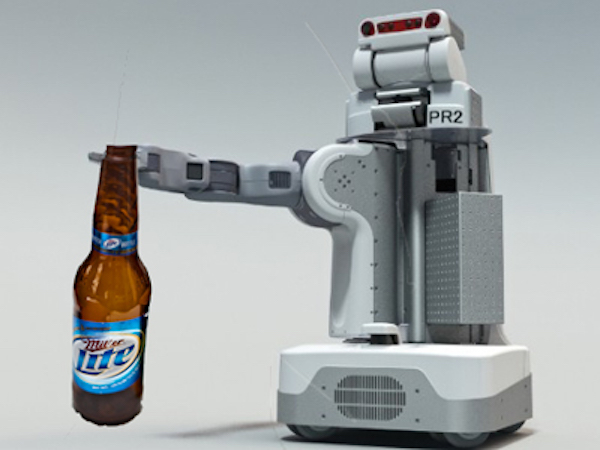

In [89]:
Image('pics/toy-of-the-day-a-400000-robot-that-will-bring-you-beer-and-bake-you-cookies.jpg')

### Miguel worked with robots...

### ... and sees networks everywhere

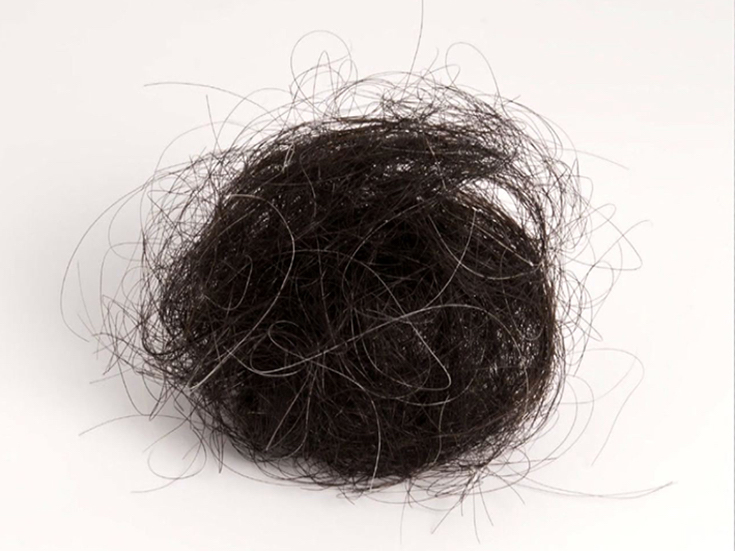

In [90]:
Image('pics/hairball3.jpg')

### We both find AI cool

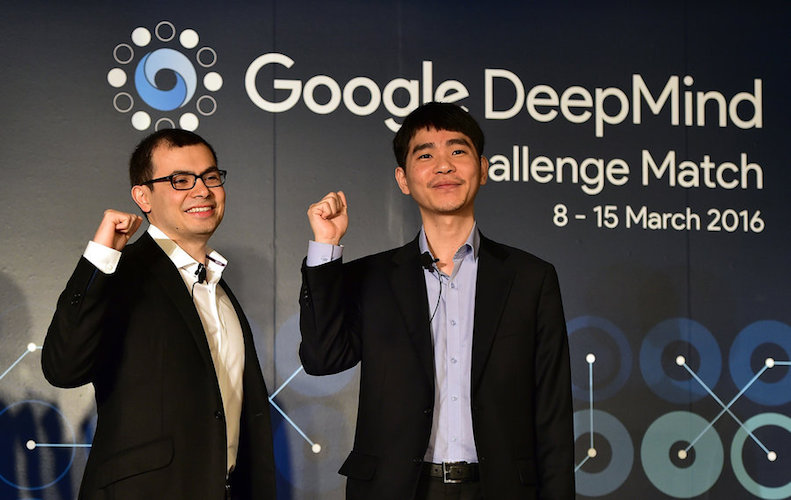

In [91]:
Image('pics/leesedol_custom-8f315deb55e697035a4f73529db4d9fc7fce4a20-s900-c85.jpg')

### and math finance as well

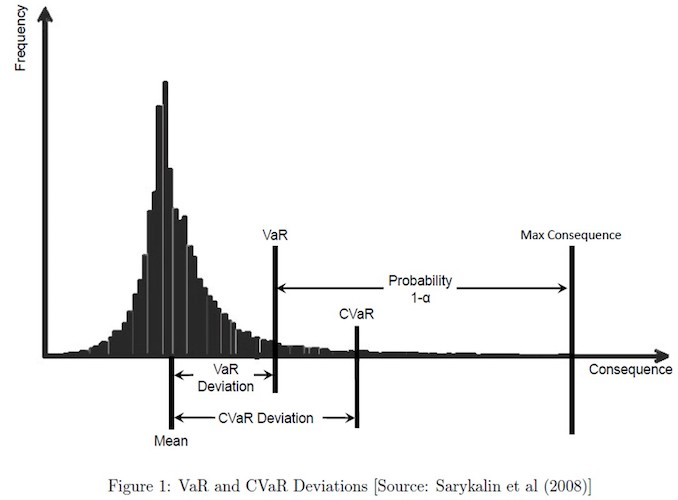

In [92]:
Image('pics/var.jpg')

## Can / should one connect both worlds?

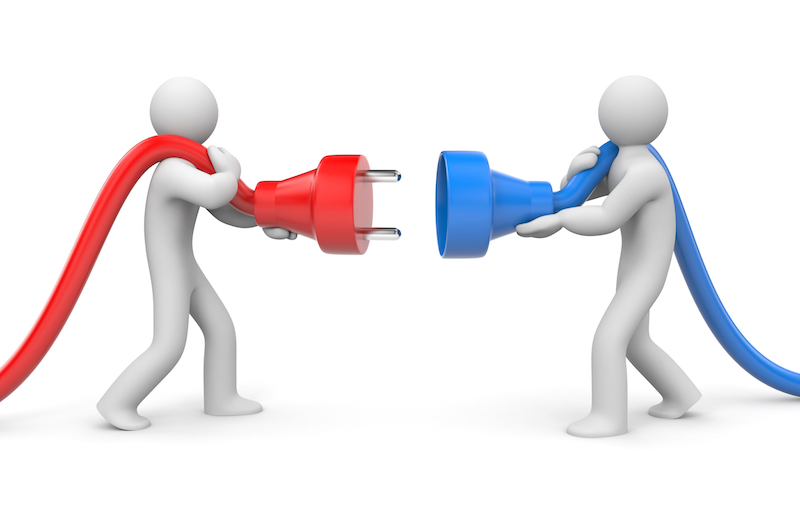

In [93]:
Image('pics/286560-connection.jpg')

## We need a cool problem!!

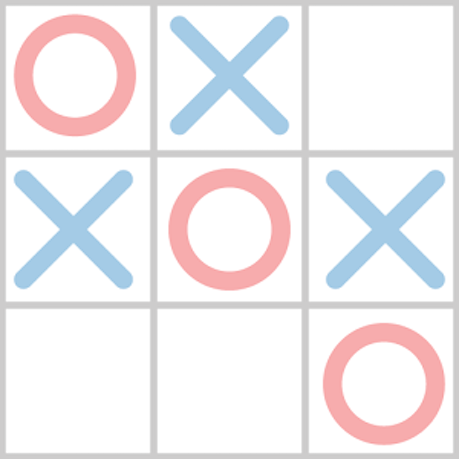

In [94]:
Image('pics/tictactoe.png')

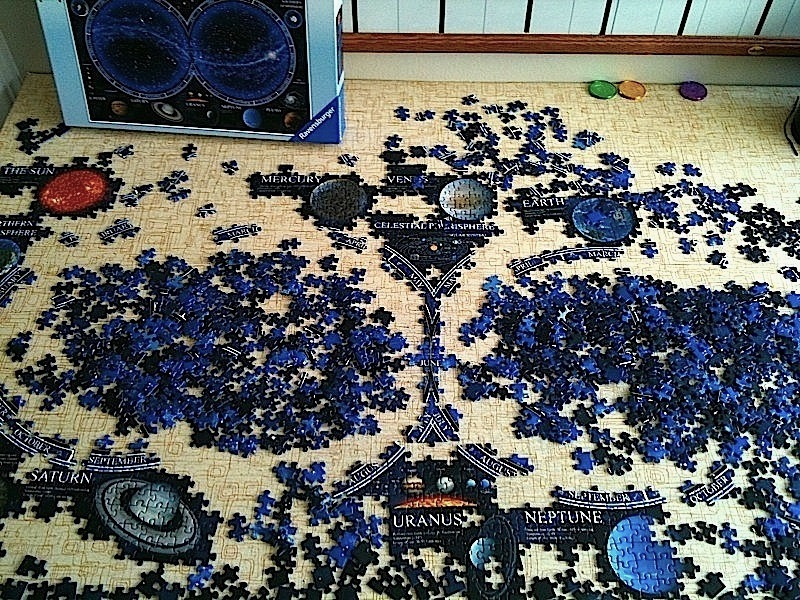

In [95]:
Image('pics/6a0120a71dc940970b0133f2e5f5ae970b.jpg')

first iteration was too much

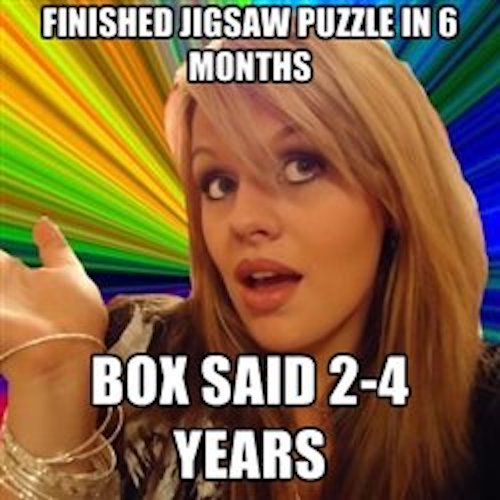

In [96]:
Image('pics/box_said_24years.jpeg')

## New Toy: Hedging

## Plan

- Some data: look at some stock price series
- devise a model for stock price series: Geometric Brownian Motion (GBM)
- Example for a contingent claim: call option
- Pricing of a call option under the assumtpion of GBM
- Challenges

## Some data: look at some stock price series

#### APPLE

Date
2000-01-03    87.761136
2000-01-04    84.782175
2000-01-05    87.761136
2000-01-06    86.248013
2000-01-07    85.869732
Name: Adj Close, dtype: float64


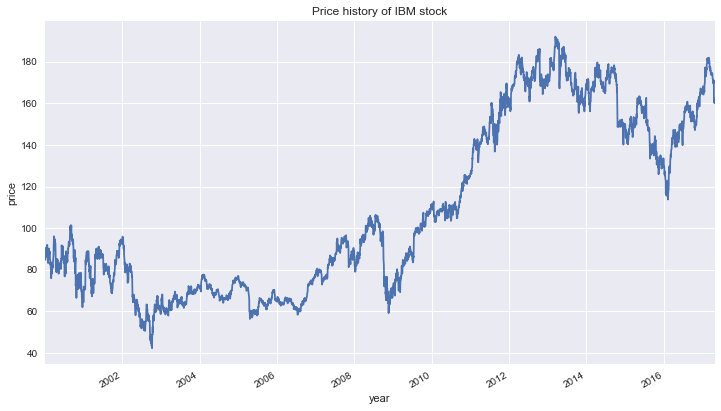

In [97]:
aapl = data.DataReader('AAPl', 'yahoo', '2000-1-1')

print(ibm['Adj Close'].head())
%matplotlib inline
ibm['Adj Close'].plot(figsize=(12,7))
plt.ylabel('price');
plt.xlabel('year')
plt.title('Price history of IBM stock');
# ## Plan

# - Some data: look at some stock price series
# - devise a model for stock price series: Geometric Brownian Motion (GBM)
# - Example for a contingent claim: call option
# - Pricing of a call option under the assumtpion of GBM
# - Challenges

# ## Some data: look at some stock price series

#### IBM

Date
2000-01-03    87.761136
2000-01-04    84.782175
2000-01-05    87.761136
2000-01-06    86.248013
2000-01-07    85.869732
Name: Adj Close, dtype: float64


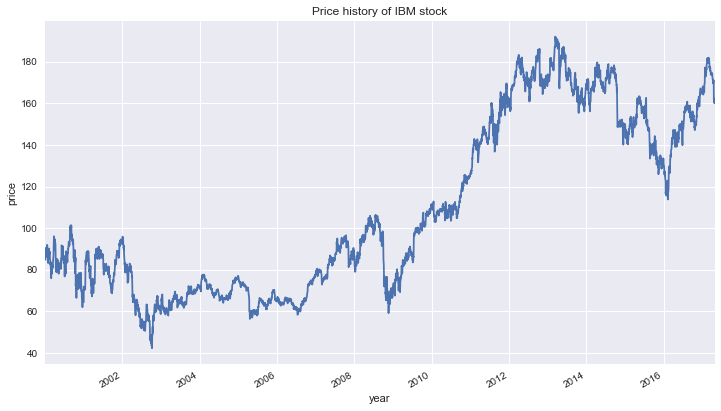

In [98]:
ibm = data.DataReader('IBM', 'yahoo', '2000-1-1')

print(ibm['Adj Close'].head())
%matplotlib inline
ibm['Adj Close'].plot(figsize=(12,7))
plt.ylabel('price')
plt.xlabel('year')
plt.title('Price history of IBM stock');


## There are many other financial instruments

What we have now prices of financial instruments:
    - bonds (assume: fixed price)
    - stocks
    - exchange rates
    - oil
    - dots
$\Longrightarrow$ Tradeables with variable prices
    
We can form a portfolio by 
    - holding some cash (possibly less than 0, that's called debts)
    - buying some stock/currency etc. (perhaps less than 0, that's called 'short)

## Why do we need more ?

- you want to play
- you are producing something and you want to assure, that the prices you achieve in one year are suffiientlyone a stock, and arewant to protect yourself against lower prices
- you want to protect yourself against higher prices
- you want to protect yourself against an increase in volatility
- you want to protect yourself against extreme price movements 
- you want to ...

$\Longrightarrow$ Essentially you want to be able to control the final value of your portfolio!

You go the bank, the bank offers you some product, you buy and are happy ....

### Obligations for the bank

- construct a product
- price the product
- hedge the product

For this talk, we take one of the easiest such products:, a call option.

### Call Option

Call option on a stock $S$ with strike price $K$ and expiry $T$: 

The buyer of the call option has the right, but not the obligation, to buy $1$ stock $S$  (the underlying) from the seller of the option at a certain time (the expiration date $T$) for a certain price (the strike price $K$).

Payoff: $$C_T =\max(0, S-K)\,.$$

### Why?

Example: you want to buy a stock next year, 01.01.2018, for 100.




#### What to do?
Buy now a call for 100 (strike price).


Next year you will have two distinct cases:

- stock trades at 80 < 100 $\Longrightarrow$  buy stock for 80 Euro, forget call option - it call is worthless
- stock trades at 120 > 100 $\Longrightarrow$ use call to buy stock for 100

### How to price the call option?

- match expectations
- utility pricing
- arbitrage free pricing $\Longrightarrow$ this is the price, enforced by the market
- ...

What is a fair price for an option with strike price $K$ and expiry $T$?
If the stock trades at a price $S$ at time $T$, then the payoff is: 

Payoff: $C_T =\max(0, S-K)\,.$

If the interest rate is $r$, we discount future cashflows with $e^{- r T}$. Thus if the stock traded at price $S$ at expire, the resulting cash-flow would be worth(time $t = 0$)
$$C_0 = e^{- r T} \max(0, S-K)\,.$$

Problem: we do not know $S_T$ at time $0$.

Solution: we take the expectation of $S$. This yields

$$C_{0, S} = e^{- r T} \mathbb{E}\left[ \max(0, S-K)\right]\,.$$

### Caveat: We have hidden a lot!!
The formal deduction is complicated via arbitrage free pricing and the Feynmann-Kac-theorem

### Where does the expectation come from?

## Theoretical model for stock price movements: Geometric Brownian motion

For the apple chart one can see, that price increments seem to correlate with the price: thus we plot logarithmic prices:

Let us plot the data logarithmically:

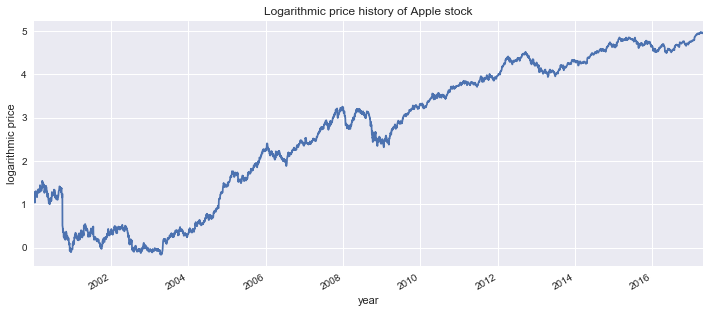

In [99]:
Log_Data = plt.figure()
%matplotlib inline
aapl['Log Adj Close'] = np.log(aapl['Adj Close'])
aapl['Log Adj Close'].plot(figsize=(12,5))
plt.ylabel('logarithmic price')
plt.xlabel('year')
plt.title('Logarithmic price history of Apple stock');


# aapl = data.DataReader('AAPl', 'yahoo', '2000-1-1')

# print(ibm['Adj Close'].head())
# %matplotlib inline
# ibm['Adj Close'].plot(figsize=(10,6))
# plt.ylabel('price')
# plt.xlabel('year')
# plt.title('Price history of IBM stock')

Now the roughness of the chart looks more even $\Rightarrow$ We should model increments proportional to the stock price!

## Assumptions of model

This leads us to some assumptions for the stock price process: 
- the distribution of relative changes is constant over time
- Small changes appear often, large changes rarly: changes are normally distributed

 $\Rightarrow$ use an exponential Gaussian distribution for increments:
 $$S_{n+1} = S_n e^{\sigma X+ \mu} $$
 where $X \sim N(0,1)$, $\sigma$ denotes the variance and $\mu$ the mean growth rate.

Let us simulate this: 
typical values for $\mu$ and $\sigma$ per year are:
- $\mu_y= 0,08$
- $\sigma_y = 0.2$

$\Rightarrow$ assuming 252 business days a year we get
$$\mu = \mu_d = \frac{\mu_y}{252}\sim 0.0003$$
$$\sigma = \sigma_d = \frac{\sigma_y}{\sqrt{252}}\sim 0,012$$

In [100]:
S0 = 1
sigma = 0.2/np.sqrt(252)
mu = 0.08/252

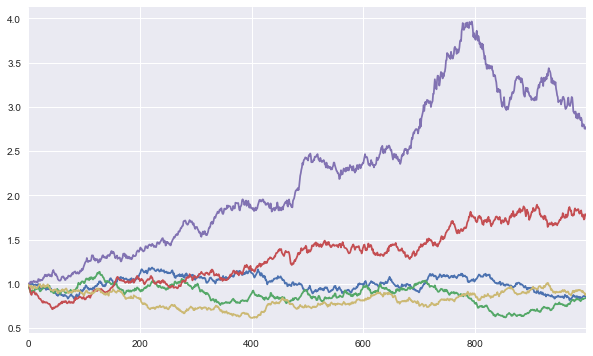

In [101]:
%matplotlib inline
for i in range(0, 5):
    r = np.random.randn((1000))
    pd.Series(S0 * np.cumprod(np.exp(sigma *r +mu))).plot(figsize=(10,6))
#     plt.plot(S0 * np.cumprod(np.exp(sigma *r +mu)))

## Black Scholes formula:

Black-Scholes Formula for the call price:

$${\displaystyle C(S_{t},t)=e^{-r(T-t)}[S_tN(d_{1})-KN(d_{2})]\,}$$

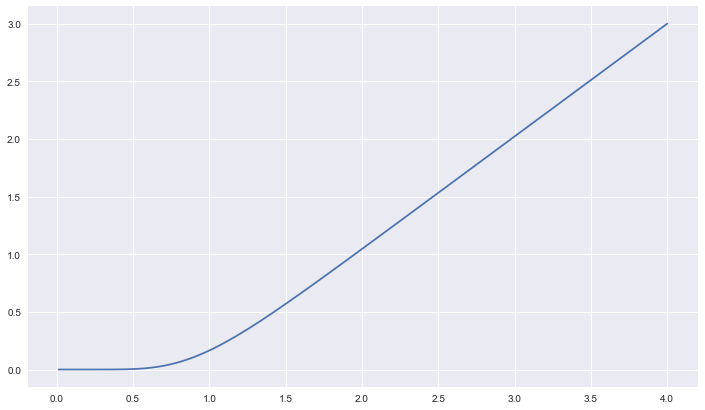

In [102]:
plt.figure(figsize=(12,7))
plt.plot(np.linspace(sigma, 4., 100), call(1., 1., .9, np.linspace(0.1, 4., 100), 1.));

$${\displaystyle d_{1}={\frac {1}{\sigma {\sqrt {T-t}}}}\left[\ln \left({\frac {S_{t}}{K}}\right)+(r-q+{\frac {1}{2}}\sigma ^{2})(T-t)\right]}$$

$${\displaystyle d_{2}=d_{1}-\sigma {\sqrt {T-t}}={\frac {1}{\sigma {\sqrt {T-t}}}}\left[\ln \left({\frac {S_{t}}{K}}\right)+(r-q-{\frac {1}{2}}\sigma ^{2})(T-t)\right]}$$

$\Delta$ describes the change in the price of the option if the stock price changes by $1$.

Black Scholes formula for the Delta:

$$ \Delta(C, t) = e^{-r(T-t)} N(d_1)$$

In [103]:
d_1 = lambda σ, T, t, S, K: 1. / σ / np.sqrt(T - t) * (np.log(S / K) + 0.5 * (σ ** 2) * (T-t))
d_2 = lambda σ, T, t, S, K: 1. / σ / np.sqrt(T - t) * (np.log(S / K) - 0.5 * (σ ** 2) * (T-t))

call = lambda σ, T, t, S, K: S * sp.stats.norm.cdf( d_1(σ, T, t, S, K) ) - K * sp.stats.norm.cdf( d_2(σ, T, t, S, K) )
Delta = lambda σ, T, t, S, K: sp.stats.norm.cdf( d_1(σ, T, t, S, K) )

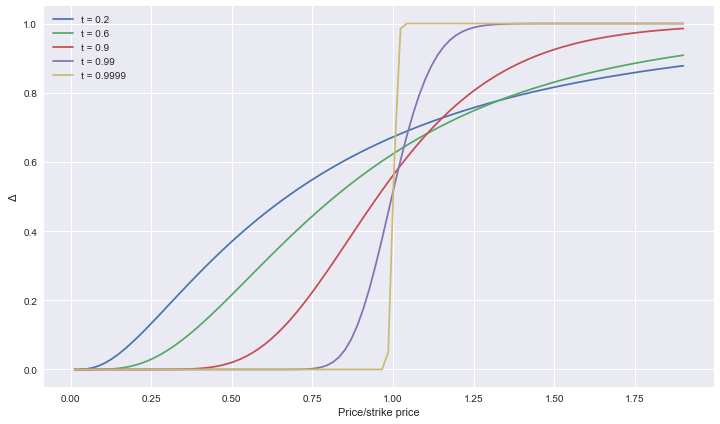

In [104]:
#plt.plot(np.linspace(sigma, 4., 100), Delta(1., 1.,  .9, np.linspace(0.1,   4., 100), 1.))

plt.figure(figsize=(12,7))
plt.plot(np.linspace(sigma, 1.9, 100), Delta(1., 1., 0.2, np.linspace(0.01, 1.9, 100), 1.))
plt.plot(np.linspace(sigma, 1.9, 100), Delta(1., 1., 0.6, np.linspace(0.01, 1.9, 100), 1.))
plt.plot(np.linspace(sigma, 1.9, 100), Delta(1., 1., 0.9, np.linspace(0.01, 1.9, 100), 1.))
plt.plot(np.linspace(sigma, 1.9, 100), Delta(1., 1., 0.99, np.linspace(0.01, 1.9, 100), 1.))
plt.plot(np.linspace(sigma, 1.9, 100), Delta(1., 1., 0.9999, np.linspace(0.01, 1.9, 100), 1.))
plt.xlabel("Price/strike price")
plt.ylabel("$\Delta$")
plt.legend(['t = 0.2','t = 0.6', 't = 0.9', 't = 0.99', 't = 0.9999'], loc  = 2);

#### Delta Hedging!

## Challenges

- 1) the price depends on the calibration of $\sigma$! Parameters may not be constant over time!
- 2) the price depends on the validity of the model

The main problem is the second one:

A)  
$\sigma$ and $\mu$ may change over time. Hence changes of volatility should adapted in the price
$\Longrightarrow$ new more complex models describing stochastic volatility are introduced, for example: 
- Heston model, 
- Ball-Roma model, 
- SABR-model and many more

B)
let us look at the log-returns:

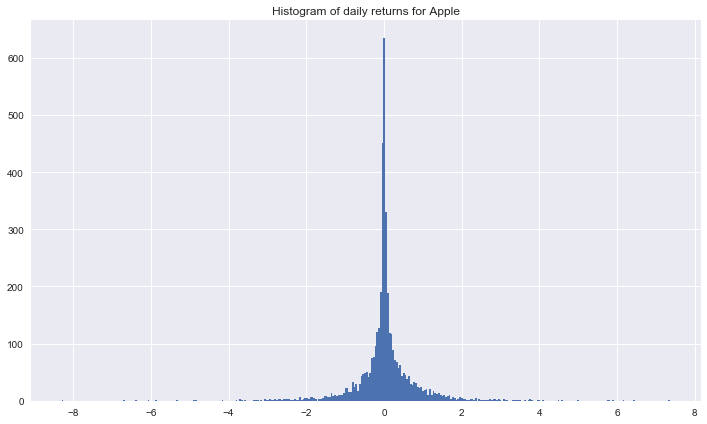

In [105]:
np.histogram(np.diff(aapl['Adj Close']))
plt.figure(figsize=(12,7))


plt.hist(np.diff(aapl['Adj Close']), bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram of daily returns for Apple")
plt.show()

### This is not a normal distribution!

2) normally distributed increments are not realistic. Real distributions are
- Heavy tails:
- Gain/Loss asymmetry 
- Aggregational Gaussianity
- Intermittency (parameter changes over time)
- Volatility clustering
- Leverage effect
- Volume/volatility correlation:
- Slow decay of autocorrelation in absolute returns:
- Asymmetry in time scales

(see for example: Rama Cont: Empirical properties of asset returns: stylized facts and statistical issues, Journal of quantitative finance, Volume 1 (2001) 223–236)


# Hedging is a control problem

![alt text](pics/driving.gif "Title Text 1")


### Delta hedging!

In [106]:
S0 = 1.5                    # start price
K = 1.0                     # strike price
mu = 0                      # average growth
sigma = 0.2/np.sqrt(252)    # volatility
N = 10000                   # runs
M = 252*4                   # length of each run (252 business days per year times 4 years)

In [107]:
def call_price(S, K):
    return max(0.0, S-K)

In [108]:
def MC_call_price(S0, K, mu, sigma, N, M):
    CSum = 0
    SSum = 0
    for n in range(N):
        r = np.random.randn((M))
        S =  S0 * np.cumprod(np.exp(sigma *r))
        SSum += S
        CSum += call_price(S[M-1], K)
    return CSum/N


### Bellmann Equation

The equation for the optimal policy is referred to as the Bellman optimality equation:

$$V^{*}(s)=\max _{a}\left{{R(s,a)+\gamma \sum _{s'}P(s'|s,a)V^{*}(s')}\right}.$$
It describes the reward for taking the action giving the highest expected return.

## Reinforcement Learning

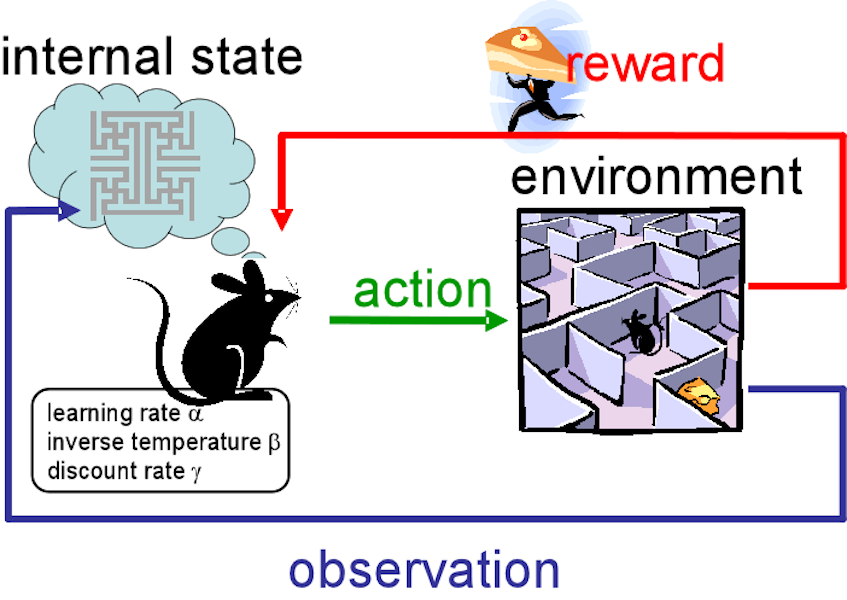

In [109]:
Image('pics/rl_interaction.png')

### Policy

A Policy is a way of finding the appropriate action given the environment.

The agent must find the policy $\pi : S \rightarrow A$ to optimize the total reward

$$R_t = r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+3} + \ldots$$
where

$$ 0 \le \gamma \le 1$$

### Value Functions

In Reinforcement Learning, learning a policy is based on estimating value functions.


A value function $V^{\pi}$ represents the expected future reward for a current state, if
the agent follows a policy $\pi$

### Action-value function

The value function $Q(s,a)$ defines how good it is to take action $a$ when in state $s$.



When the model of the environment is unavailable, the value function has to be learned.

## The hedging problem

In [110]:
The optimal policy is know under the assumptions.

SyntaxError: invalid syntax (<ipython-input-110-a81216c54ea4>, line 1)

### Action Space

Buy / sell stock

### World State


- $\frac{S}{K}$ Stock price relative to strike of option
- $\tau$ time left till exercise
- $number of stocks?$ 

#### Reward

$${\underbrace {max(S_T-K, 0)}_{\rm{call~option-payoff~at~maturity}}} + 
{\underbrace {n \times S_T}_{\rm{stock~value}}} +
\rm{cash}
$$

In [ ]:
Image('pics/56320eee49f48878d16867cbe7958b8c.jpg')

$$R_T = - \mid \mid {\underbrace {max(S_T-K, 0)}_{\rm{call~option-payoff~at~maturity}}} + 
{\underbrace {n \times S_T}_{\rm{stock~value}}} +
\rm{cash} \mid \mid
$$

In [ ]:
Image('pics/Self-control-is-the-ability.jpg')

### Q-Learning

Simplest off-policy algorithm

$$
{\displaystyle Q(s_{t},a_{t})\leftarrow \underbrace {Q(s_{t},a_{t})} _{\rm {old~value}}+\underbrace {\alpha _{t}} _{\rm {learning~rate}}\cdot \left(\overbrace {\underbrace {r_{t+1}} _{\rm {reward}}+\underbrace {\gamma } _{\rm {discount~factor}}\cdot \underbrace {\max _{a}Q(s_{t+1},a)} _{\rm {estimate~of~optimal~future~value}}} ^{\rm {learned~value}}-\underbrace {Q(s_{t},a_{t})} _{\rm {old~value}}\right)}
$$

- Initialize $V(s)$ arbitrarily
- Repeat for each episode
- Initialize s
- Repeat (for each step of episode)
- -    $\alpha \leftarrow$ action given by $\pi$ for $s$
- - Take action a, observe reward r, and next state s'
- - $V(s) \leftarrow V(s) + \alpha [r + \gamma V(s') - V(s)]$ 
- - $s \leftarrow s'$
- until $s$ is terminal

In [ ]:
Image('pics/q-learning.png')

### Open Problem

Off-policy does not always converge with function approximation.

### An alternative: SARSA

Derivation of Q-learning with on-policy estimation of future value.

$$
{\displaystyle Q(s_{t},a_{t})\leftarrow \underbrace {Q(s_{t},a_{t})} _{\rm {old~value}}+\underbrace {\alpha _{t}} _{\rm {learning~rate}}\cdot \left(\overbrace {\underbrace {r_{t+1}} _{\rm {reward}}+\underbrace {\gamma } _{\rm {discount~factor}}\cdot \underbrace {Q(s',a')} _{\rm {on-policy~estimate~of~optimal~future~value}}} ^{\rm {learned~value}}-\underbrace {Q(s_{t},a_{t})} _{\rm {old~value}}\right)}
$$

But is on-policy and does find as good policies.

### Additional Problem: need to choose function approximation!

In [ ]:
Image('pics/ohman.jpg')

### Cross Entropy Optimization

Define the value-state function as 


$$
A = W S + b
$$

1: generate $N$ random samples according to some distribution

2: simulate each of the samples and pick the best $n$

3: update the distribution from the which to sample

In [ ]:
a = np.array([-135.372, -1.584, -2.219, -0.660, -0.341, -0.342, -0.917, -0.760, -1.146, -0.555, -0.827, -0.646, -0.414, -1.929, -0.721, -0.338, -0.346, -0.985, -0.410, -0.427, -0.510, -0.694, -1.500, -0.586, -0.440, -0.940, -0.247, -0.455, -0.211, -0.823, -0.278, -1.456, -0.736, -0.343, -1.501, -1.591, -0.386, -0.446, -0.404, -0.300, -3.595, -0.446, -0.547, -0.474, -0.337, -0.985, -0.689, -0.902, -0.310, -0.579, -2.550, -0.721, -0.689, -0.360, -1.809, -0.348, -0.310, -0.500, -2.533, -0.376, -0.213, -1.411, -0.316, -0.461, -0.467, -0.661, -0.628, -0.816, -0.442, -0.381, -0.269, -1.025, -0.522, -0.759, -0.491, -0.460, -0.654, -0.498, -0.326, -0.572, -0.530, -0.552, -0.635, -1.215, -0.954, -0.309, -0.363, -0.575, -0.556, -0.802, -0.574, -1.428, -0.707, -1.794, -0.336, -0.322, -0.847, -0.424, -0.271, -0.991, -1.284, -0.701, -0.373, -0.427, -1.136, -0.745, -0.500, -0.362, -0.669, -0.298, -0.957, -3.324, -0.287, -0.725, -0.736, -1.176, -1.318, -0.519, -0.318, -0.351, -0.293, -0.493, -0.608, -0.409, -0.410, -0.747, -0.411, -0.963, -0.414, -0.392, -1.446, -0.590, -1.690, -0.580, -0.884, -0.291, -0.319, -0.586, -1.280, -0.363, -1.063, -0.896, -0.573, -0.533, -0.418, -2.153, -2.110, -0.503, -1.603, -0.441, -0.866, -0.369, -0.706, -0.512, -1.144, -2.927, -0.870, -0.311, -0.186, -0.503, -0.467, -0.368, -0.446, -1.097, -0.620, -0.666, -0.479, -0.457, -0.465, -0.371, -0.370, -0.308, -0.239, -1.027, -0.266, -0.479, -0.229, -1.506, -0.423, -2.805, -0.576, -0.333, -0.341, -0.292, -0.466, -1.011, -0.636, -0.550, -0.704, -0.842, -0.568, -0.497, -2.465, -0.752, -0.608, -0.312, -0.195, -0.504, -2.192, -0.736, -0.576, -0.473, -0.636, -0.620, -0.432, -0.313, -0.363, -0.497, -0.306, -1.084, -0.618, -0.363, -0.387, -0.572, -0.612, -0.376, -0.313, -0.530, -0.275, -0.974, -0.328, -0.325, -0.818, -1.162, -1.691, -0.331, -0.432, -0.448, -0.732, -0.327, -0.596, -0.895, -0.244, -2.087, -0.270, -0.302, -0.646, -0.740, -0.494, -0.444, -0.579, -0.577, -0.520, -1.460, -0.378, -1.142, -0.295, -0.341, -0.453, -0.863, -1.580, -1.693, -0.355, -0.225, -0.516, -0.508, -0.471, -0.719, -0.653, -0.368, -0.484, -0.332, -0.621, -0.546, -0.797, -0.449, -0.279, -0.479, -0.583, -0.521, -0.670, -0.577, -0.533, -0.494, -0.399, -0.615, -0.319, -0.752, -0.655, -1.075, -0.419, -2.039, -0.325, -0.341, -0.718, -0.434, -0.707, -0.593, -0.487, -0.459, -0.701, -0.415, -0.542, -0.541, -0.341, -0.705, -0.399, -0.400, -0.541, -0.787, -0.492, -1.103, -0.291, -0.437, -0.260, -0.808, -0.284, -0.441, -0.293, -0.374, -0.344, -0.612, -0.779, -0.712, -0.454, -0.429, -1.269, -1.019, -0.835, -0.868, -0.733, -0.533, -0.960, -1.109, -2.929, -0.468, -0.283, -2.248, -0.513, -0.349, -0.700, -0.826, -0.377, -0.452, -0.369, -1.485, -0.335, -5.649, -1.006, -0.677, -0.300, -1.134, -0.319, -0.403, -1.614, -1.273, -0.351, -0.203, -0.600, -0.535, -0.405, -0.440, -0.459, -0.290, -0.398, -0.431, -0.668, -0.380, -1.259, -0.738, -0.589, -3.801, -0.423, -0.381, -0.312, -0.714, -0.637, -0.382, -0.584, -0.281, -0.468, -0.468, -0.469, -1.994, -0.507, -0.462, -1.335, -0.535, -0.271, -0.728, -1.276, -1.071, -1.232, -0.597, -0.768, -0.987, -1.320, -0.344, -0.744, -0.852, -0.985, -0.420, -0.524, -1.018, -0.593, -0.312, -0.472, -0.332, -0.963, -0.518, -0.255, -0.259, -0.449, -1.370, -0.295, -0.570, -0.489, -0.910, -1.112, -0.362, -0.652, -0.190, -2.094, -0.283, -0.688, -0.567, -0.940, -0.408, -0.715, -0.340, -0.395, -1.142, -0.481, -0.827, -0.394, -0.385, -0.558, -0.313, -0.542, -0.451, -1.291, -0.845, -0.301, -0.392, -0.246, -0.433, -0.886, -0.200, -0.541, -0.381, -0.437, -0.569, -1.264, -1.146, -0.367, -0.768, -0.241, -1.041, -0.371, -0.592, -0.296, -0.934, -0.772, -0.253, -0.314, -0.960, -0.734, -0.537, -0.579, -0.684, -0.477, -0.635, -0.559, -0.529, -3.089, -0.550, -2.934, -0.271, -0.794, -1.209, -0.562, -0.492, -0.308, -0.708, -0.457, -6.474, -1.013, -0.631, -0.678, -0.423, -0.608, -0.336, -0.756, -0.305, -0.308, -0.633, -0.467, -0.240, -0.627, -0.599, -0.238, -1.278, -1.292, -0.382, -1.178, -0.329, -0.272, -0.549, -0.492, -0.687, -0.465, -0.957, -0.407, -0.497, -0.520, -0.259, -0.384, -1.593, -0.462, -1.878, -0.278, -0.295, -0.345, -0.508, -1.910, -0.414, -2.018, -0.448, -0.710, -0.251, -0.342, -0.718, -0.363, -0.774, -0.388, -0.281, -0.936, -0.303, -0.466, -0.547, -0.464, -0.289, -0.743, -1.052, -0.663, -0.429, -0.277, -0.338, -0.557, -0.429, -0.410, -0.449, -0.609, -0.562, -0.398, -0.298, -0.554, -1.103, -0.375, -0.400, -0.384, -0.536, -1.005, -0.612, -0.256, -1.612, -0.286, -1.515, -0.809, -0.370, -0.809, -0.293, -0.608, -0.582, -1.151, -0.376, -0.372, -1.325, -0.352, -1.379, -0.456, -0.309, -0.448, -0.550, -0.943, -0.753, -0.878, -0.783, -0.402, -1.717, -0.392, -1.922, -0.405, -0.324, -0.478, -0.742, -0.497, -0.438, -0.519, -0.738, -0.935, -0.828, -0.376, -0.503, -0.805, -0.323, -0.262, -0.530, -0.727, -0.390, -0.272, -2.180, -0.328, -0.648, -0.646, -0.453, -0.592, -0.365, -1.529, -1.335, -0.445, -0.885, -2.762, -0.694, -1.089, -0.349, -0.374, -0.722, -0.373, -0.594, -0.449, -0.901, -0.704, -0.476, -0.501, -1.083, -0.256, -0.797, -0.310, -1.071, -0.577, -0.631, -5.652, -0.462, -0.634, -0.226, -0.390, -0.405, -0.622, -5.784, -0.440, -0.655, -1.546, -0.350, -0.444, -0.635, -0.254, -1.101, -1.947, -0.734, -0.583, -0.692, -1.292, -0.357, -0.257, -0.491, -1.979, -2.039, -0.342, -0.384, -0.496, -0.452, -0.302, -0.422, -1.024, -0.322, -0.520, -0.336, -0.413, -0.546, -0.386, -0.371, -0.391, -0.266, -0.635, -0.294, -0.654, -0.455, -3.824, -0.719, -0.824, -0.344, -0.361, -0.461, -5.345, -5.908, -0.646, -0.639, -0.353, -0.780, -0.377, -0.323, -0.595, -0.389, -0.899, -0.277, -0.340, -3.367, -0.413, -0.548, -4.023, -0.377, -0.639, -0.548, -0.240, -0.438, -0.585, -0.489, -0.510, -0.496, -0.836, -0.637, -0.546, -2.030, -0.325, -1.175, -0.634, -0.377, -1.406, -0.435, -0.611, -1.036, -0.212, -0.653, -1.339, -0.626, -0.404, -0.369, -0.848, -3.549, -0.387, -0.374, -0.316, -1.268, -0.397, -0.448, -0.716, -0.782, -0.472, -0.510, -0.455, -1.978, -0.671, -0.488, -0.243, -0.811, -0.367, -0.614, -0.896, -0.280, -0.392, -1.039, -0.330, -0.765, -1.894, -0.399, -0.351, -2.029, -1.259, -0.983, -0.684, -0.465, -0.490, -0.509, -0.307, -0.758, -0.354, -0.735, -1.184, -1.038, -0.820, -0.623, -1.042, -0.485, -0.506, -0.434, -0.301, -0.299, -0.603, -0.381, -0.384, -0.810, -0.641, -0.526, -0.689, -0.302, -0.374, -0.580, -0.271, -0.289, -0.248, -1.600, -0.366, -0.283, -0.736, -0.623, -0.683, -1.178, -0.390, -0.303, -0.477, -0.608, -0.547, -0.489, -0.394, -0.401, -0.457, -0.609, -0.617, -0.307, -1.233, -1.418, -0.539, -0.672, -0.914, -0.482, -0.669, -1.575, -0.385, -0.242, -1.082, -0.779, -2.752, -0.525, -0.577, -0.569, -0.301, -1.072, -1.771, -0.475, -0.301, -1.041, -0.187, -1.346, -0.601, -0.337, -0.389, -0.666, -0.251, -0.760, -0.452, -0.585, -0.390, -0.420, -0.325, -0.544, -3.205, -0.520, -1.149, -1.139, -0.590, -1.614, -0.833, -0.401, -0.372, -0.505, -1.599, -0.474, -0.282, -0.316, -0.754, -0.820, -0.257, -0.256, -2.529, -1.125, -0.713, -0.966, -0.563, -0.615, -0.570, -1.148, -0.345, -0.313, -0.406, -0.292, -1.885, -1.137, -0.397, -0.310, -0.739, -0.598, -0.564, -0.310, -0.777, -0.490, -0.471, -0.398, -0.620, -0.453, -0.309, -0.719, -11.467, -3.115, -0.565, -0.294, -1.014, -0.626, -1.624, -0.438, -0.578, -0.257, -0.388, -0.326, -0.725, -0.313, -0.375, -1.192, -0.710, -0.788, -2.208, -0.318, -2.760, -0.634, -1.017, -0.730, -1.277, -1.381, -0.350, -1.145, -0.924, -0.338, -1.706, -0.961, -0.860, -4.125, -0.493, -0.784, -0.678, -0.538, -0.366, -0.365, -0.416, -0.774, -0.586, -0.675, -0.350, -0.543, -0.946, -0.564, -0.631, -0.968, -0.396, -1.688, -0.657, -0.981, -0.574, -0.633, -1.390, -0.327, -0.201, -0.408, -0.445, -0.271, -3.008, -1.303, -7.573, -5.027, -0.301, -0.708, -0.570, -0.352, -0.950, -1.109, -0.874, -0.645, -1.143, -1.099, -0.482, -2.171, -0.413, -0.676, -0.563, -0.930, -0.344, -0.408, -0.468, -0.885, -0.377, -0.446, -0.670, -0.478, -0.352, -0.385, -0.918, -1.085, -0.230, -1.035, -0.523, -0.406, -0.563, -0.306, -1.041, -0.690, -0.344, -0.700, -0.507, -0.776, -0.598, -0.499])

### Results

In [ ]:
%matplotlib inline 
pd.DataFrame(np.clip(a, -10, 0), columns=['reward']).plot(figsize=(12,7))
#.plot(figsize=(20,10), x)

... we're still working on it

But we put the code online for you to help!
    
https://github.com/FinTechies/HedgingRL